<h2><center>Week 2 - Assignment</center></h2>
<h3><center>Programming for Data Science 2024</center></h3>

Exercises for the topics covered in the second lecture.

**Important**: You will need sounddevice, numpy, scipy and matplotlib. To install these, run *pip install sounddevice numpy scipy matplotlib* in the terminal, or *!pip install sounddevice numpy scipy matplotlib* in Jupyter. You will also need the data in the *data* folder.

The exercise will be marked as passed if you get **at least 10/15** points.

Exercises must be handed in via **ILIAS** (Homework assignments). Deliver your submission as a compressed file (zip) containing one .py or .ipynb file with all exercises. The name of both the .zip and the .py/.ipynb file must be *SurnameName* of the two members of the group. Example: Riccardo Cusinato + Athina Tzovara = *CusinatoRiccardo_TzovaraAthina.zip* .

It's important to use comments to explain your code and show that you're able to take ownership of the exercises and discuss them.

You are not expected to collaborate outside of the group on exercises and submitting other groups’ code as your own will result in 0 points.

For questions contact: *riccardo.cusinato@unibe.ch* with the subject: *Programming for Data Science 2024*.

**Deadline: 14:00, March 7, 2024.**

<h3 style="text-align:left;">Exercise 1 - Audio signal<span style="float: right">5 points</span></h3>

In this exercise you'll work with continuous audio signals. First we load and plot the audio signals:

In [95]:
!pip3 install sounddevice numpy scipy matplotlib

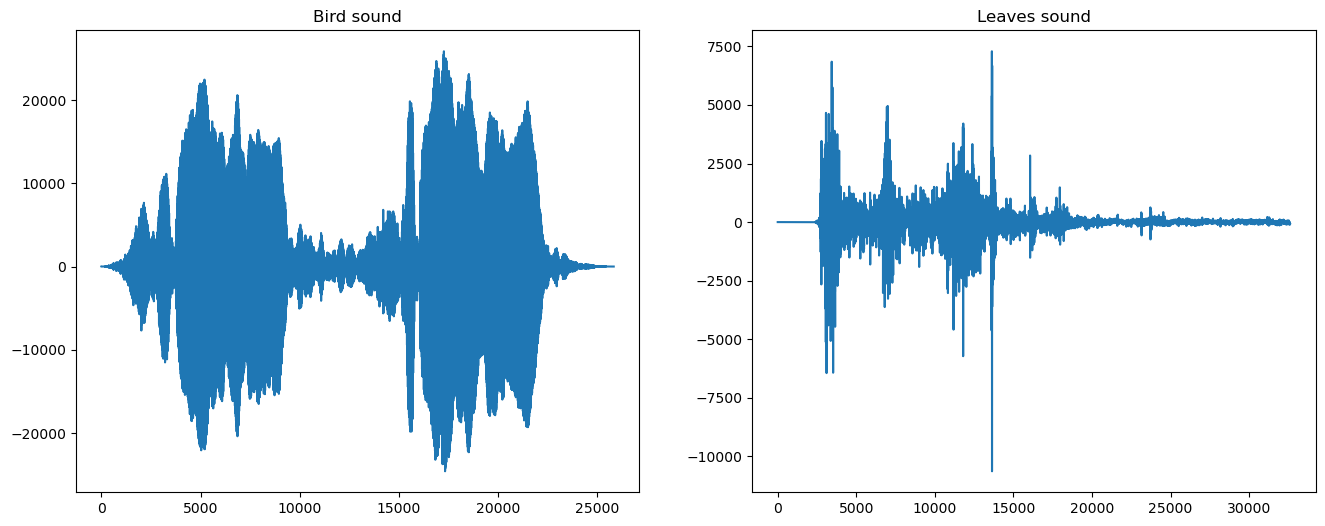

In [4]:
# Import dependencies
import time
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import read

fs_bird, sound_bird = read('./data/bird.wav')
fs_leaves, sound_leaves = read('./data/leaves.wav')

# Plot sounds in different subplots
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(sound_bird)
plt.title("Bird sound")
plt.subplot(1, 2, 2)
plt.plot(sound_leaves)
plt.title("Leaves sound")
plt.show()

# Play sounds
time.sleep(1)
sd.play(sound_bird, fs_bird)
time.sleep(1)
sd.play(sound_leaves, fs_leaves)
time.sleep(1)

1. Double the amplitude of the second audio signal (leaves) using *numpy*. Then plot the amplified signal using *matplotlib*. (*1 point*)

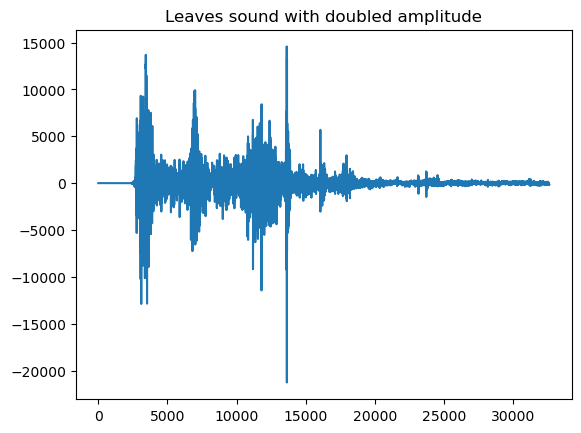

In [8]:
import numpy as np

sound_leaves2 = sound_leaves * 2 #doubling all elements in array

plt.plot(sound_leaves2) # plotting updated array
plt.title("Leaves sound with doubled amplitude")
plt.show()

2. The two sounds don't have the same length (number of samples). Print the length of the two sounds and create a new leaves sound as long as the birds sound. Print again the lenghts to make sure they match. (Use the amplified leaves sound previously created). (*1 point*)

In [20]:
print(len(sound_leaves), len(sound_bird))

sound_leaves_cut = sound_leaves2[:25824] #slicing the amplified leaves sound
print(len(sound_leaves_cut) == len(sound_bird)) #check if lengths match

32612 25824
True


3. Create a silence period (0 amplitude) of the same duration of the two sounds, using *numpy*. (*1 point*)

In [22]:
silence = np.zeros(len(sound_bird)) # array full of zeros to represent the null amplitude

silence

array([0., 0., 0., ..., 0., 0., 0.])

4. Finally, concatenate the diffent sounds into one. The order should be: silence, birds, silence, leaves, silence (use the amplified and cut leaves sound). Use *numpy* and plot the results. (*2 points*)

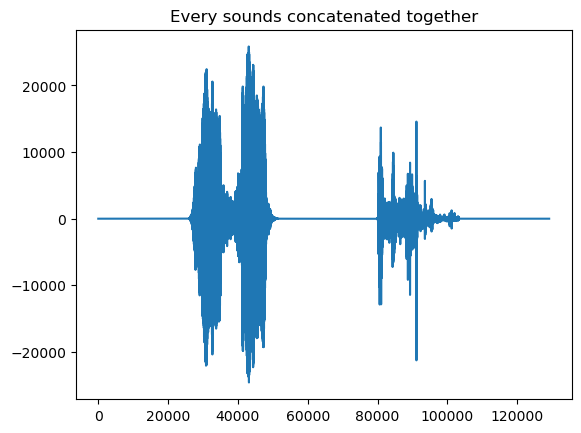

In [25]:
every_sounds = np.concatenate([silence, sound_bird, silence, sound_leaves_cut, silence]) # concatenating every arrays

plt.plot(every_sounds) #plotting the resulting array
plt.title("Every sounds concatenated together")
plt.show()

<h3 style="text-align:left;">Exercise 2 - Image data<span style="float: right">7 points</span></h3>

In this exercise, you'll work with an image, i.e. an n-dimensional matrix data. First, we load and plot the image:

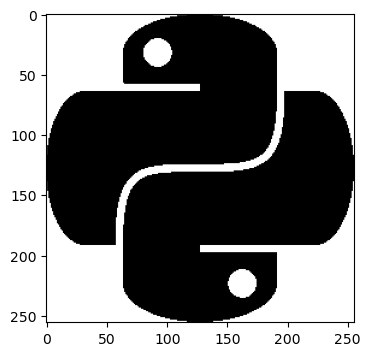

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

im = plt.imread('./data/python.bmp')
im = np.array(im)

plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

The image is a 3-dimensional array, where the 1st and 2nd dimensions represent positions on the Y (rows) and X (columns) axes and the 3rd saturation values between 0 and 255 for that specific position, as [red, green, blue].

1. Set the pixels on the 50th to 60th row and and 200th to 210th column to green, and displays the resultant image. The data-type of the array should be an 8-bit unsigned integer. (*1 point*)

**NB!** 
- From the 50th row, up to and including the 60th; From the 200th column, up to and including the 210th.
- Keep in mind that the first dimension is related to the usual Y axis, and the second dimension to the usual X axis.

It's uint8.


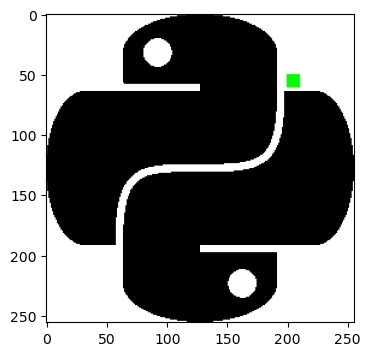

In [6]:
if im.dtype == np.uint8:
    print("It's uint8.")
else: print("Not uint8")

im[50:61, 200:211] = [0, 255, 0] # first dimension = rows, second one = columns
plt.figure(figsize=(4, 4))
plt.imshow(im)
plt.show()

2. The image created in point 1 will be the one you use in the rest of the exercise. Make a copy of the top half of the image, flip it along the 2nd axis using the appropriate numpy method, and plot the result. (*1 point*)

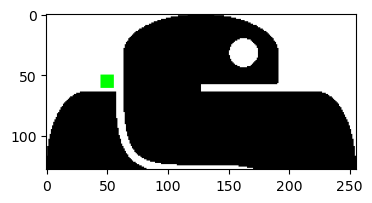

In [12]:
im_upper = im[:int(round(len(im)/2, 0))].copy()
im_upper = np.flip(im_upper, axis=1)

#show the image
plt.figure(figsize=(4, 4))
plt.imshow(im_upper)
plt.show()

3. Make a copy of the bottom half of your image, combine it together with the first half you flipped in point 2, and display the result. Also plot your original image and check whether it has changed. (*1 point*)

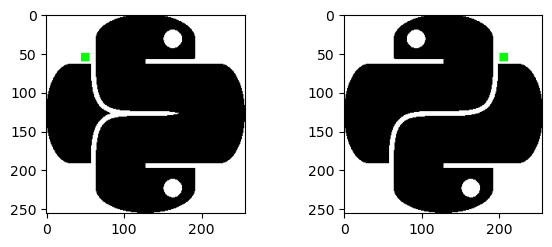

In [13]:
im_bottom = im[int(round(len(im)/2, 0)):].copy()
im_final = np.concatenate((im_upper, im_bottom))

plt.subplot(1, 2, 1)
plt.imshow(im_final)

plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,2)
plt.imshow(im)

plt.show()

4. Make a shallow copy (view) of the top half of your image. Change every black pixel ([0, 0, 0]) to a green pixel ([0, 255, 0]). Plot the resulting colored top part, together with the base of your shallow copy and also the original image. (*2 points*)

**Hint**: to test that a condition holds for multiple elements use the *numpy.all* function.

128


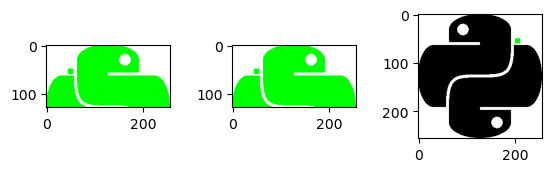

In [18]:
shallow_copy = im_upper.view()

black_pixels = np.all(im_upper == [0, 0, 0], axis=-1) # check for black pixels in array 
print(len(black_pixels))
shallow_copy[black_pixels] = [0, 255, 0] # transforming every black pixels to green pixels

# plotting all 3 graphs
plt.subplot(1, 3, 1)
plt.imshow(shallow_copy)

plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 3, 2)
plt.imshow(im_upper)

plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 3, 3)
plt.imshow(im)

plt.show()

5. In point 3, your original image should not have changed, while in point 4, the original image should show the same change as when plotting the base of your shallow copy. Give a brief explanation of why the original image changed in one instance, and not in the other. (*2 points*)

In [19]:
Because the view() method creates an alias of the base image, meaning that their are not two identical copies, but the base image has its own memory adress for the data, while the shallow copy references to the same adress.
This means that modifying the shallow_copy implies modifying the data of the base image respectively.

SyntaxError: invalid syntax (3649038828.py, line 1)

<h3 style="text-align:left;">Exercise 3 - Tabular data<span style="float: right">3 points</span></h3>

In the following you'll work with tabular data, i.e. data related to multiple observations. The dataset consists of synthetic data on monthly average precipitations in 4 different countries: Switzerland, Italy, France and Germany. Let's first load the dataset and assign the variables:

In [44]:
import numpy as np

precip = np.load("./data/precip.npy", allow_pickle=True)

switzerland = precip[:, 0]  # 12 data points for Switzerland (one per month)
italy = precip[:, 1]  # 12 data points for Italy (one per month)
france = precip[:, 2]  # 12 data points for France (one per month)
germany = precip[:, 3]  # 12 data points for Germany (one per month)

1. Use built-in numpy methods to obtain an array with the maximum precipitation for each country, and the average precipitation *across* the five countries for each month. (*1 point*)

In [33]:
relative_maxs = np.apply_along_axis(np.max, axis=0, arr=precip) # searching max value in each column (each countries)

avg_precipitation = np.apply_along_axis(np.mean, axis=1, arr=precip) # computing the average precipitation in each line (average precipitation for each month)

print(relative_maxs)
print(avg_precipitation)

[3.05 2.56 2.89 3.55]
[0.7    0.745  1.855  2.8875 2.99   1.965  1.905  1.64   1.85   1.3
 1.3775 0.82  ]


2. Obtain the maximum precipitation of the entire dataset. Next, use a numpy method to find out at which row and column in the dataset you would find this maximum precipitation at. (*2 points*)

In [43]:
maximum_value = np.apply_along_axis(np.max, axis=0, arr=relative_maxs) #reusing the previous method
print(maximum_value)

print(np.where(precip == maximum_value)) # getting indexes to know where the max value is in the dataset

3.55
(array([4]), array([3]))
